<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_4_2_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(n_samples=300, noise=0.25, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

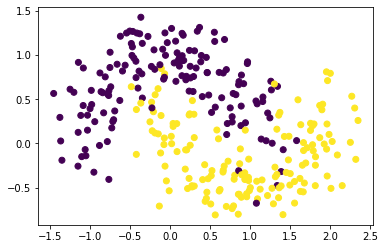

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

# Bagging avec arbre de classification

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=4)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8666666666666667


In [5]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.84


In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=1, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#b8a3ff','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha,color="#530689")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha,color="#009838")
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

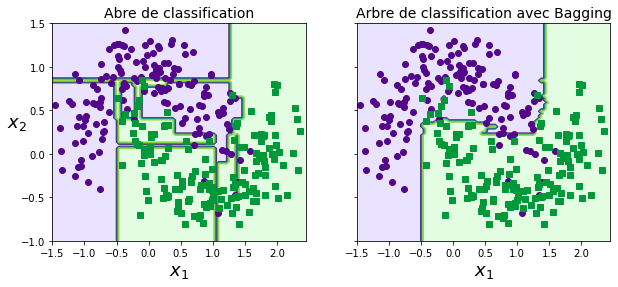

In [7]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Abre de classification", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Arbre de classification avec Bagging", fontsize=14)
plt.ylabel("")

plt.show()

# Modèle de régression avec bagging

**Question** Créer un modèle de régression avec bagging et l'appliquer aux données des ventes immobilières.

In [8]:
import pandas as pd
housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")
housing = housing.replace(to_replace='yes', value=1, regex=True)
housing = housing.replace(to_replace='no', value=0, regex=True)

from sklearn.model_selection import train_test_split

X = housing[['lotsize','bedrooms','stories','bathrms','bathrms','driveway','recroom',
        'fullbase','gashw','airco','garagepl','prefarea']]

y = housing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

rbag_clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=500,max_samples=100,bootstrap=True,random_state=4)
rbag_clf.fit(X_train, y_train)
y_pred = rbag_clf.predict(X_test)

E = y_pred - y_test
S = E**2
M = S.mean()
R = np.sqrt(M)
R
#C'est moins précis qu'avec la regression ) variable multiple, le RMSE obtenu avant est 152528.584165

167264.28042793323